# Overview of pylandstats

In [ ]:
import swisslandstats as sls

import pylandstats as pls

Running the cell below is required so that:
- the land use/land cover (LULC) data is downloaded and preprocessed (see [A03-swisslandstats-preprocessing.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/A03-swisslandstats-preprocessing.ipynb) for more details).
- the elevation zones vector data is downloaded and preprocessed (see [A04-elev-zones.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/A04-elev-zones.ipynb) for more details).

In [ ]:
!snakemake -c1 -d .. -s ../Snakefile veveyse_lulc_tifs elev_zones

Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2024-07-25T191825.567508.snakemake.log


## Landscape analysis

We can load landscapes from raster files and compute pandas data frames of patch, class and landscape level. See the notebook [01-landscape-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/01-landscape-analysis.ipynb) for more thorough demonstration.

In [ ]:
URBAN_CLASS_VAL = 1
input_filepath = "../data/processed/veveyse/LU18_4.tif"

<Axes: >

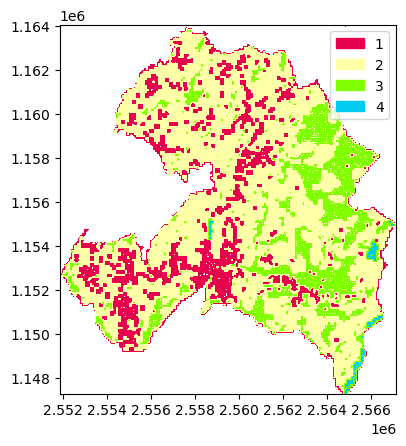

In [ ]:
ls = pls.Landscape(input_filepath)
ls.plot_landscape(cmap=sls.noas04_4_cmap, norm=sls.noas04_4_norm, legend=True)

In [ ]:
patch_metrics_df = ls.compute_patch_metrics_df()
patch_metrics_df.head()

,class_val,area,perimeter,perimeter_area_ratio,shape_index,fractal_dimension,core_area,number_of_core_areas,core_area_index,euclidean_nearest_neighbor
patch_id,,,,,,,,,,
0,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,360.555128
1,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,360.555128
2,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,200.000000
3,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,200.000000
4,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,424.264069


In [ ]:
class_metrics_df = ls.compute_class_metrics_df()
class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,core_area_proportion_of_landscape,number_of_disjunct_core_areas,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,1041.0,7.749572,287,2.136529,1.421872,256600.0,19.102211,90.0,0.669992,20,...,223.606798,1100.000000,168.551251,54.504167,4.500000,20.400000,1.0,31.0,8.458723,187.971629
2,7907.0,58.862503,47,0.349885,46.862205,639500.0,47.606640,3589.0,26.717785,130,...,200.000000,561.577311,84.548722,36.703367,27.607692,747.952354,3.0,1555.0,141.021466,510.804975
3,4126.0,30.715402,165,1.228318,20.605970,434600.0,32.353160,1636.0,12.178962,75,...,223.606798,528.010989,94.721867,35.526380,21.813333,198.039120,3.0,395.0,62.000579,284.232484
4,359.0,2.672523,137,1.019876,0.588104,75900.0,5.650264,58.0,0.431773,8,...,412.310563,3124.154028,381.220569,74.637981,7.250000,12.896552,5.5,20.0,6.398242,88.251613


In [ ]:
landscape_metrics_df = ls.compute_landscape_metrics_df()
landscape_metrics_df

,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
0,13433.0,636,4.734609,46.862205,703300.0,52.356138,5373.0,233,17.278017,3593.476141,...,223.606798,3124.154028,236.550901,70.45117,23.060086,509.698816,3.0,1555.0,111.314332,482.7143


<a id='spatiotemporal-analysis'></a>
## Spatio-temporal analysis

Given a temporally-ordered sequence of landscape snapshots, we can also analyze the spatio-temporal patterns of landscape change. To that end, pylandstats can compute pandas dataframes with the evolution of the metrics and plot them, both at the class and landscape level. See the notebook [02-spatiotemporal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/02-spatiotemporal-analysis.ipynb) for a more thorough demonstration.

In [ ]:
input_filepaths = [
    "../data/processed/veveyse/LU85_4.tif",
    "../data/processed/veveyse/LU97_4.tif",
    "../data/processed/veveyse/LU09_4.tif",
    "../data/processed/veveyse/LU18_4.tif",
]
years = ["1980", "1992", "2004", "2013"]

In [ ]:
sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=years)

In [ ]:
sta.compute_class_metrics_df()

[########################################] | 100% Completed | 1.29 ss


total_area  proportion_of_landscape  number_of_patches  \
class_val dates                                                           
1         1980        702.0                 5.225936                304   
          1992        794.0                 5.910817                309   
          2004        906.0                 6.744584                304   
          2013       1041.0                 7.749572                287   
2         1980       8351.0                62.167796                 32   
          1992       8185.0                60.932033                 40   
          2004       8052.0                59.941934                 42   
          2013       7907.0                58.862503                 47   
3         1980       3967.0                29.531750                169   
          1992       4072.0                30.313407                161   
          2004       4112.0                30.611181                162   
          2013       4126.0                30.715402                165   
4         1980        413.0                 3.074518                161   
          1992        382.0                 2.843743                152   
          2004        363.0                 2.702300                144   
          2013        359.0                 2.672523                137   

                 patch_density  largest_patch_index  total_edge  edge_density  \
class_val dates                                                                 
1         1980        2.263083             0.454106    208400.0     15.514033   
          1992        2.300305             0.602993    227800.0     16.958237   
          2004        2.263083             0.699769    242000.0     18.015335   
          2013        2.136529             1.421872    256600.0     19.102211   
2         1980        0.238219            52.170029    615000.0     45.782774   
          1992        0.297774            48.596739    621700.0     46.281545   
          2004        0.312663            47.829971    630500.0     46.936649   
          2013        0.349885            46.862205    639500.0     47.606640   
3         1980        1.258096            15.610809    438500.0     32.643490   
          1992        1.198541            18.573662    439500.0     32.717933   
          2004        1.205985            20.576193    434300.0     32.330827   
          2013        1.228318            20.605970    434600.0     32.353160   
4         1980        1.198541             0.580660     92100.0      6.856250   
          1992        1.131542             0.595548     83000.0      6.178813   
          2004        1.071987             0.580660     76000.0      5.657709   
          2013        1.019876             0.588104     75900.0      5.650264   

                 total_core_area  core_area_proportion_of_landscape  \
class_val dates                                                       
1         1980              25.0                           0.186109   
          1992              28.0                           0.208442   
          2004              50.0                           0.372218   
          2013              90.0                           0.669992   
2         1980            4076.0                          30.343185   
          1992            3902.0                          29.047867   
          2004            3735.0                          27.804660   
          2013            3589.0                          26.717785   
3         1980            1509.0                          11.233529   
          1992            1584.0                          11.791856   
          2004            1633.0                          12.156629   
          2013            1636.0                          12.178962   
4         1980              57.0                           0.424328   
          1992              58.0                           0.431773   
          2004              58.0                           0.431773   


In [ ]:
sta.compute_landscape_metrics_df()

[########################################] | 100% Completed | 3.37 ss


,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
dates,,,,,,,,,,,,,,,,,,,,,
1980,13433.0,666,4.957939,52.170029,677000.0,50.398273,5667.0,200,16.711207,4074.760143,...,223.606798,3124.154028,216.625926,66.540480,28.335000,533.272195,3.0,1352.0,124.855928,440.642061
1992,13433.0,662,4.928162,48.596739,686000.0,51.068265,5572.0,209,16.905172,3721.028140,...,223.606798,3124.154028,222.286812,67.856637,26.660287,534.324217,3.0,1444.0,121.661679,456.340467
2004,13433.0,652,4.853718,47.829971,691400.0,51.470260,5476.0,219,17.021552,3711.910593,...,223.606798,3124.154028,231.885409,69.562278,25.004566,777.260594,3.0,2049.0,143.674210,574.591890
2013,13433.0,636,4.734609,46.862205,703300.0,52.356138,5373.0,233,17.278017,3593.476141,...,223.606798,3124.154028,236.550901,70.451170,23.060086,509.698816,3.0,1555.0,111.314332,482.714300


We can also plot the time series of metrics at the class level, e.g., the evolution of the proportion of landscape occupied by the land use class value `1` (urban):

[########################################] | 100% Completed | 101.20 ms


<Axes: ylabel='PLAND'>

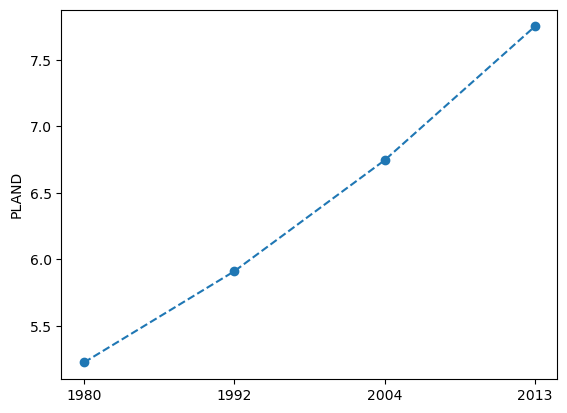

In [ ]:
sta.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

or we can also plot at the landscape level by not providing any `class_val` argument, e.g., the evolution of the area-weighted mean fractal dimension of all the patches of the landscape:

[########################################] | 100% Completed | 107.28 ms


<Axes: ylabel='FRAC_AM'>

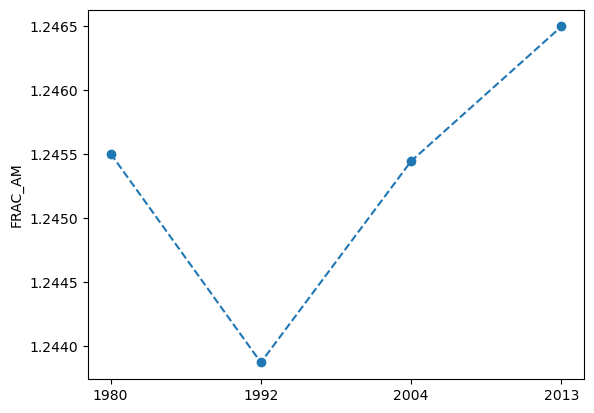

In [ ]:
sta.plot_metric("fractal_dimension_am")

<a id='zonal-analysis'></a>
## Zonal analysis

Zonal analysis is a common procedure to compute statistics for a set of specified spatial zones. PyLandStats features three classes to perform zonal analysis, `ZonalAnalysis`, `BufferAnalysis` and `ZonalGridAnalysis`. The first allows user to fully customize how the zones are defined, while `BufferAnalysis` and `ZonalGriAnalysis` provide a convenient way to instantiate specific cases of zonal analysis, i.e., adding buffers around a feature of interest or as a regular rectangular grid over the landscape, respectively. See the notebook [03-zonal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/03-zonal-analysis.ipynb) for a thorough demonstration of the use cases described above.

To define the zones of a `ZonalAnalysis`, we can use - among other options - any geographic data file that can be read by [geopandas.read_file](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html#geopandas.read_file). For instance, we can use a geopackage file defining three elevation zones in our landscape:

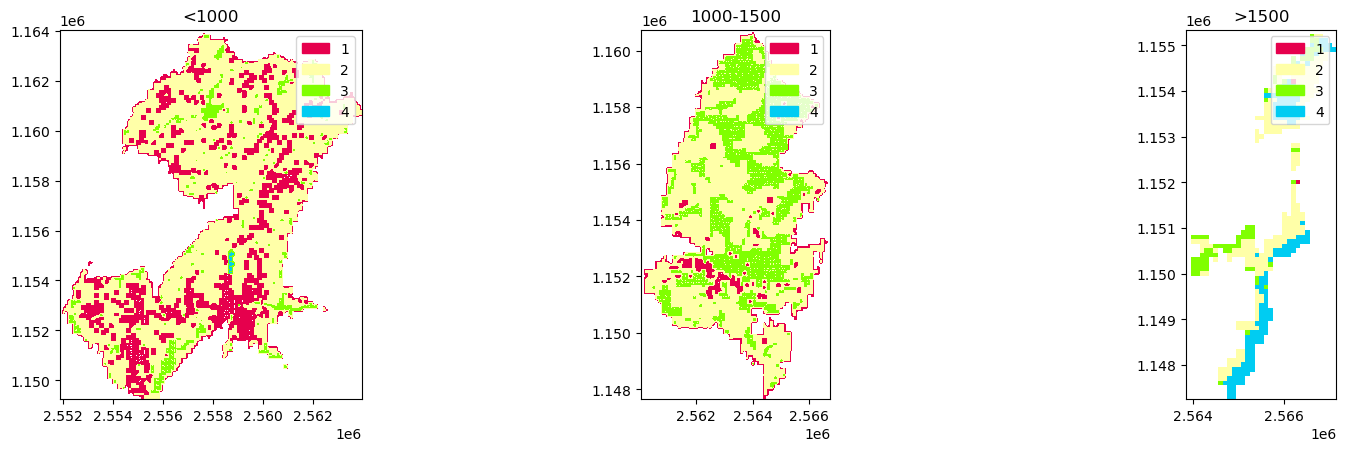

In [ ]:
elev_zones_filepath = "../data/processed/elev-zones.gpkg"

za = pls.ZonalAnalysis(input_filepath, elev_zones_filepath, zone_index="elev-zone")
# plot the landscapes of each zone
fig = za.plot_landscapes(
    cmap=sls.noas04_4_cmap, show_kwargs=dict(norm=sls.noas04_4_norm)
)

Analogously to the spatio-temporal analysis, we can use the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods to compute the metrics for each zone:

In [ ]:
za.compute_class_metrics_df()

[########################################] | 100% Completed | 1.71 ss


/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


total_area  proportion_of_landscape  number_of_patches  \
class_val elev-zone                                                           
1         <1000           911.0                11.212308                232   
          1000-1500       117.0                 2.564103                 49   
          >1500             2.0                 0.421941                  2   
2         <1000          5753.0                70.806154                 26   
          1000-1500      1800.0                39.447732                 45   
          >1500           237.0                50.000000                 11   
3         <1000          1339.0                16.480000                151   
          1000-1500      2583.0                56.607495                 41   
          >1500            78.0                16.455696                 15   
4         <1000           122.0                 1.501538                 79   
          1000-1500        63.0                 1.380671                 43   
          >1500           157.0                33.122363                 11   

                     patch_density  largest_patch_index  total_edge  \
class_val elev-zone                                                   
1         <1000           2.855385             2.289231    219200.0   
          1000-1500       1.073855             0.460224     32200.0   
          >1500           0.421941             0.210970       500.0   
2         <1000           0.320000            67.876923    422100.0   
          1000-1500       0.986193            12.447951    178900.0   
          >1500           2.320675            17.932489     15900.0   
3         <1000           1.858462             2.535385    213500.0   
          1000-1500       0.898532            46.833224    188800.0   
          >1500           3.164557             8.016878      9300.0   
4         <1000           0.972308             0.283077     37800.0   
          1000-1500       0.942362             0.065746     21100.0   
          >1500           2.320675            15.611814     12500.0   

                     edge_density  total_core_area  \
class_val elev-zone                                  
1         <1000         26.978462             87.0   
          1000-1500      7.056761              2.0   
          >1500          1.054852              0.0   
2         <1000         51.950769           2722.0   
          1000-1500     39.206662            618.0   
          >1500         33.544304             48.0   
3         <1000         26.276923            212.0   
          1000-1500     41.376288           1283.0   
          >1500         19.620253              6.0   
4         <1000          4.652308              4.0   
          1000-1500      4.624151              0.0   
          >1500         26.371308             44.0   

                     core_area_proportion_of_landscape  \
class_val elev-zone                                      
1         <1000                               1.070769   
          1000-1500                           0.043831   
          >1500                               0.000000   
2         <1000                              33.501538   
          1000-1500                          13.543721   
          >1500                              10.126582   
3         <1000                               2.609231   
          1000-1500                          28.117467   
          >1500                               1.265823   
4         <1000                               0.049231   
          1000-1500                           0.000000   
          >1500                               9.282700   

                     number_of_disjunct_core_areas  ...  \
class_val elev-zone                                 ...   
1         <1000                                 17  ...   
          1000-1500                              2  ...   
          >1500                                  0  ...   
2         <1000                                 81  ..

In [ ]:
za.compute_landscape_metrics_df()

[########################################] | 100% Completed | 2.17 ss


,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
elev-zone,,,,,,,,,,,,,,,,,,,,,
<1000,8125.0,488,6.006154,67.876923,446300.0,54.929231,3025.0,134,14.715470,3761.643938,...,223.606798,1624.828759,189.354754,59.810237,22.574627,770.677127,2.0,1525.0,136.180761,603.247007
1000-1500,4563.0,178,3.900942,46.833224,210500.0,46.131931,1903.0,95,9.988971,1144.435021,...,223.606798,2216.609195,323.048708,85.277595,20.031579,150.305451,4.0,387.0,54.403067,271.586516
>1500,474.0,39,8.227848,17.932489,19100.0,40.295359,98.0,14,5.897727,52.371308,...,223.606798,2002.271555,471.829939,109.526193,7.000000,9.600000,5.0,20.0,6.094494,87.064200


We can also use the `plot_metric` method to plot the metrics computed for each zone, e.g., how the proportion of landscape occupied by the land use class value `1` (urban) changes accross elevation zones

[########################################] | 100% Completed | 106.19 ms


<Axes: ylabel='PLAND'>

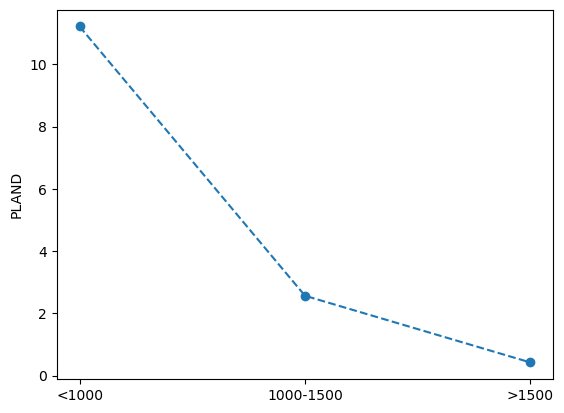

In [ ]:
za.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

Like in the spatio-temporal analysis, the plots at the landscape level can obtained by not providing any `class_val` argument.

In order to visualize such information in space, the zonal statistics can be computed in the form of a geo-data frame with the `compute_zonal_statistics_gdf` method as in:

In [ ]:
metrics = ["proportion_of_landscape", "edge_density"]
zonal_statistics_gdf = za.compute_zonal_statistics_gdf(
    metrics=metrics, class_val=URBAN_CLASS_VAL
)

zonal_statistics_gdf.head()

[########################################] | 100% Completed | 101.27 ms


,edge_density,proportion_of_landscape,geometry
elev-zone,,,
1000-1500,7.056761,2.564103,"POLYGON ((2563900.000 1160700.000, 2563900.000..."
<1000,26.978462,11.212308,"MULTIPOLYGON (((2560900.000 1150500.000, 25607..."
>1500,1.054852,0.421941,"MULTIPOLYGON (((2566300.000 1151500.000, 25665..."


the computed metrics are essentially the same as those obtained using the `compute_class_metrics_df` or `compute_landscape_metrics_df` (depending on whether a `class_val` argument is provided or not), with an additional column featuring the vector geometry of each zone. This actually corresponds to a geopandas geo-data frame, and as such, we can use [its `geopandas.GeoDataFrame.explore` method](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) to obtain an interactive map as in:

In [ ]:
zonal_statistics_gdf.explore()

## Spatio-temporal zonal analysis

We might also be interested in performing the same zonal analysis at different points in time. This is why pylandstats features an additional `SpatioTemporalZonalAnalysis` analysis class - as well as `SpatioTemporalBufferAnalysis` and `SpatioTemporalZonalGridAnalysis`. See the notebook [04-spatiotemporal-zonal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/04-spatiotemporal-zonal-analysis.ipynb) for a more thorough demonstration.

Let us take the sequence of landscapes `input_filepaths` from [the spatio-temporal analysis above](#spatiotemporal-analysis) and let us use again the `dates` argument to specify the dates that correspond to each landscape.
Let us also take the latitude and longitude of the center of Lausanne as well as the elevation zones from [the zonal analysis above](#zonal-analysis). Now we can construct our `SpatioTemporalZonalAnalysis` instance and evaluate the sensitive of our spatio-temporal analysis to the extent of the map:

In [ ]:
stza = pls.SpatioTemporalZonalAnalysis(
    input_filepaths, elev_zones_filepath, dates=years, zone_index="elev-zone"
)

In [ ]:
stza.compute_class_metrics_df()

[######                                  ] | 16% Completed | 1.36 sms

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[####################                    ] | 50% Completed | 2.03 s

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[##########################              ] | 66% Completed | 2.46 s

/home/martibosch/data-science/landscape-connectivity-barcelona/src/pylandstats/pylandstats/landscape.py:1338: RuntimeWarning: Class 1 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[########################################] | 100% Completed | 2.66 s


total_area  proportion_of_landscape  \
class_val elev-zone date                                        
1         <1000     1980       602.0                 7.409231   
                    1992       680.0                 8.369231   
                    2004       786.0                 9.673846   
                    2013       911.0                11.212308   
          1000-1500 1980        89.0                 1.950471   
                    1992       101.0                 2.213456   
                    2004       108.0                 2.366864   
                    2013       117.0                 2.564103   
          >1500     1980         1.0                 0.210970   
                    1992         2.0                 0.421941   
                    2004         2.0                 0.421941   
                    2013         2.0                 0.421941   
2         <1000     1980      6070.0                74.707692   
                    1992      5988.0                73.698462   
                    2004      5877.0                72.332308   
                    2013      5753.0                70.806154   
          1000-1500 1980      1915.0                41.968004   
                    1992      1840.0                40.324348   
                    2004      1818.0                39.842209   
                    2013      1800.0                39.447732   
          >1500     1980       246.0                51.898734   
                    1992       240.0                50.632911   
                    2004       239.0                50.421941   
                    2013       237.0                50.000000   
3         <1000     1980      1313.0                16.160000   
                    1992      1328.0                16.344615   
                    2004      1337.0                16.455385   
                    2013      1339.0                16.480000   
          1000-1500 1980      2469.0                54.109139   
                    1992      2552.0                55.928117   
                    2004      2575.0                56.432172   
                    2013      2583.0                56.607495   
          >1500     1980        66.0                13.924051   
                    1992        70.0                14.767932   
                    2004        77.0                16.244726   
                    2013        78.0                16.455696   
4         <1000     1980       140.0                 1.723077   
                    1992       129.0                 1.587692   
                    2004       125.0                 1.538462   
                    2013       122.0                 1.501538   
          1000-1500 1980        90.0                 1.972387   
                    1992        70.0                 1.534078   
                    2004        62.0                 1.358755   
                    2013        63.0                 1.380671   
          >1500     1980       161.0                33.966245   
                    1992       162.0                34.177215   
                    2004       156.0                32.911392   
                    2013       157.0                33.122363   

                          number_of_patches  patch_density  \
class_val elev-zone date                                     
1         <1000     1980                252       3.101538   
                    1992                250       3.076923   
                    2004                249       3.064615   
                    2013                232       2.855385   
          1000-1500 1980                 45       0.986193   
                    1992                 49       1.073855   
                    2004                 47       1.030024   
                    2013                 49       1.073855   
          >1500     1980                  1       0.210970   
                    1992                  2       0.421941   
                    2004       

[########################################] | 100% Completed | 106.25 ms


<Axes: ylabel='PLAND'>

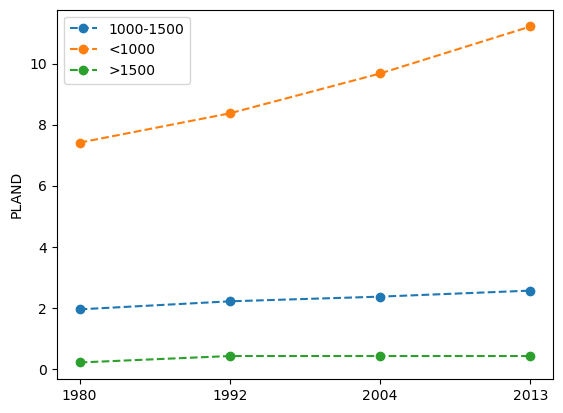

In [ ]:
stza.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)